<a href="https://colab.research.google.com/github/vaib-p/Vaib-p/blob/main/pract4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
sent="Hello! friends? how are you"

In [15]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
word_tokenize(sent)

['Hello', '!', 'friends', '?', 'how', 'are', 'you']

In [18]:
from nltk.corpus import stopwords

In [21]:
sword=stopwords.words('english')

In [26]:
clean=[word for word in word_tokenize(sent)  if word not in sword]

In [28]:
clean

['Hello', '!', 'friends', '?']

In [33]:
from nltk.stem import PorterStemmer

In [34]:
ps=PorterStemmer()

In [36]:
clean=[ps.stem(word) for word in word_tokenize(sent)  if word not in sword]

In [37]:
clean

['hello', '!', 'friend', '?']

In [39]:
def clean_text(sent):
  tokens=word_tokenize(sent)
  clean=[word for word in tokens if word.isdigit() or word.isalpha()]
  clean=[ps.stem(word) for word in clean if word not in sword ]

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [52]:
x=df['text']
y=df['label']

In [55]:
x.shape

(5572,)

In [59]:
tfidf.fit(x)

TfidfVectorizer()

In [61]:
x_new=tfidf.fit_transform(x)

In [62]:
x_new.shape

(5572, 8713)

In [69]:
tfidf.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [71]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=1,test_size=0.25)

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
nb=GaussianNB()

In [81]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
y_pred=nb.predict(x_test.toarray())

In [86]:
accuracy_score(y_test,y_pred)

0.8973438621679828

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf=RandomForestClassifier(random_state=1)

In [92]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [93]:
y2_pred=rf.predict(x_test)

In [94]:
accuracy_score(y_test,y2_pred)

0.9842067480258435

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

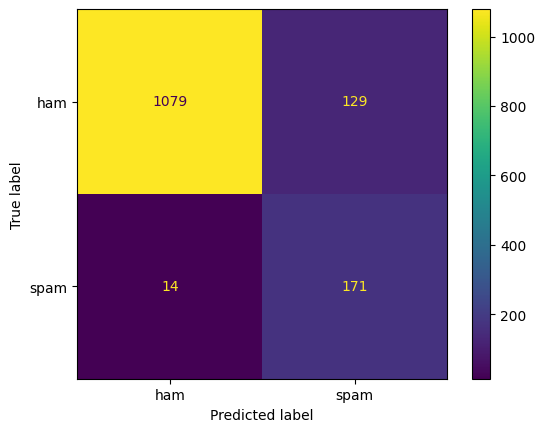

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

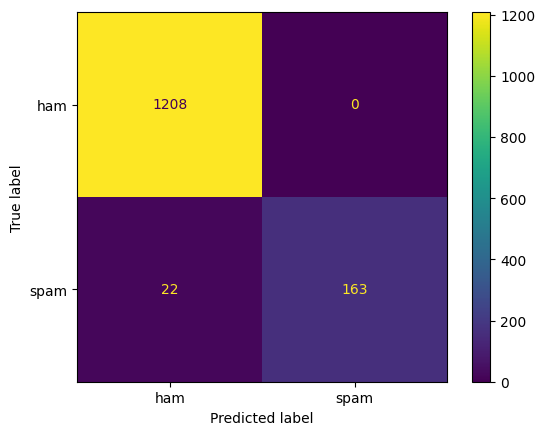

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,y2_pred)

In [99]:
#Hypewr parameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV


In [103]:
param_grid={
    'criterion':['gini','entropy'],
    'max_features':['log2','sqrt'],
    'class_weight':['balanced','balanced_subsample'],
    'random_state':[1,2,3,4,5]
}

In [106]:
grid=GridSearchCV(rf,param_grid,cv=5,scoring='accuracy')

In [107]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'random_state': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [111]:
rf=grid.best_estimator_

In [113]:
yprd=rf.predict(x_test.toarray())

In [115]:
accuracy_score(y_test,yprd)

0.9770279971284996